In [1]:
def match(TAs, courses,pref,skill):
    from collections import Counter
    from copy import copy
    
    courses_available = {ta:courses for ta in TAs}
    waiting_list = []
    assigned = {}
    count = 0
    while len(waiting_list)<len(TAs):
        for ta in TAs:
            if ta not in waiting_list:
                co = courses_available[ta]
                best_choice = pref.loc[ta][pref.loc[ta].index.isin(co)].idxmin()
                assigned[(ta, best_choice)]=(pref.loc[ta][best_choice],
                                                 skill.loc[ta][best_choice])

        """
            If one course has more than one assigning 
            it will choose the skilled option
        """
        countt = Counter([key[1] for key in assigned.keys()])

        for c in countt.keys():
            if countt[c]>1:
                to_drop = sorted({pair: assigned[pair] for pair in assigned.keys() 
                        if c in pair}.items(), 
                    key=lambda x: x[1][1])[1:]

                for p_to_drop in to_drop:
                    del assigned[p_to_drop[0]]
                    cour = copy(courses_available[p_to_drop[0][0]])
                    cour.remove(p_to_drop[0][1])
                    courses_available[p_to_drop[0][0]] = cour
        waiting_list = [t[0] for t in assigned.keys()]
        count+=1
    return(assigned)

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd

In [3]:
# recording the time for various calls

# Given data
TAs=['Aya', 'Pola', 'Yasmin', 'Farah']
Courses=['205','207','217','479']
PrefRank=[[[2],[3],[1],[4]],[[3],[2],[4],[1]],[[2],[1],[4],[3]],[[4],[3],[2],[1]]]
SkillRank=[[[1],[3],[2],[4]],[[1],[4],[2],[3]],[[3],[2],[1],[4]],[[1],[4],[2],[3]]]

#empty lists and dataframes to append later
tas = []
pref1 = pd.DataFrame({})
skill1 = pd.DataFrame({})
times = []

#each iteration the length of the array increases approaching the worst time complexity 
for i in range(0,len(TAs)):
    # Append one TA each iteration
    tas.append(TAs[i])

    # create dataframe for each TA each iteration to be passed to the function each iteration
    pref = pd.DataFrame({Courses[0]: PrefRank[i][0],Courses[1]: PrefRank[i][1],
        Courses[2]: PrefRank[i][2],Courses[3]:PrefRank[i][3]})
    skill = pd.DataFrame({Courses[0]: SkillRank[i][0],Courses[1]: SkillRank[i][1],
        Courses[2]: SkillRank[i][2],Courses[3]: SkillRank[i][3]})

    # append/concatinate on the original dataframe
    pref1=pd.concat([pref1,pref])
    skill1=pd.concat([skill1,skill])
    pref1.index = tas
    skill1.index = tas
    # start time 
    start = time.perf_counter_ns()
    # call the matching function
    match(tas,Courses,pref1,skill1)
    # end time
    end = time.perf_counter_ns()
    # append to the time list
    times.append(end-start)

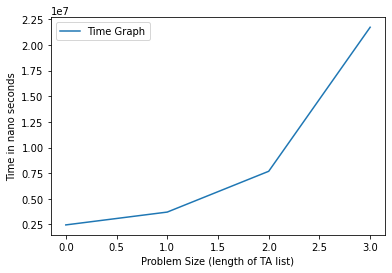

In [4]:
# the code to plot the curve
plt.plot(range(0,len(TAs)), times, label='Time Graph')
plt.xlabel('Problem Size (length of TA list)')
plt.ylabel('Time in nano seconds')
plt.legend()
plt.show()